In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
df = pd.read_csv("/content/sample_data/bank.csv")

**This is an exploration of data**

In [4]:
df.shape

(11162, 17)

In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [6]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [8]:
df.isna().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


**As we notice that  null values  written as unknown so I retrieve it null to easy solve this problem**

In [9]:
df = df.replace("unknown", np.nan)

In [10]:
df.isna().sum()

,0
age,0
job,70
marital,0
education,497
default,0
balance,0
housing,0
loan,0
contact,2346
day,0


**   we will fill missing categorical values with mode**

In [11]:
df.select_dtypes(include="object").columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')

** we detect with is Categorical Data  and have null values we find(poutcome ///  contact ///  eduction // job) as we notice all columns that have null values is cateogical so we will impute them with mode **

In [12]:
for col in df.select_dtypes(include="object").columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

/tmp/ipython-input-1936385350.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


** we replace each null value with mode of this col and make inplace= True to change in the original Dataset**

** Now, we solve the null values (missings problem)...Make summary statistics to check normality and handle outliers**

In [13]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


** To check firstly the balance we make countplot with target**

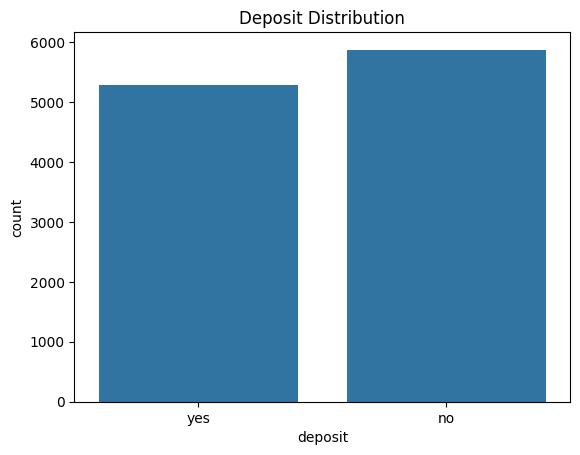

In [14]:
sns.countplot(data=df, x="deposit")
plt.title("Deposit Distribution")
plt.show()

** It is almost balanced Data**

** Check cateogrical Distribution**

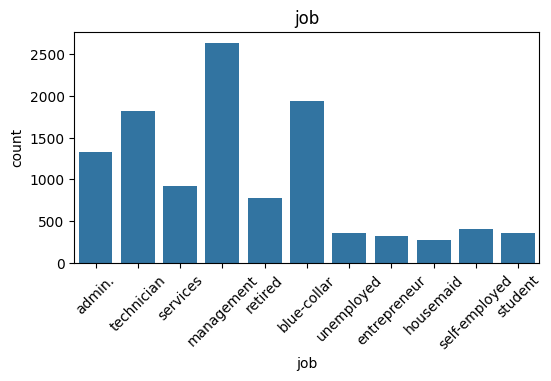

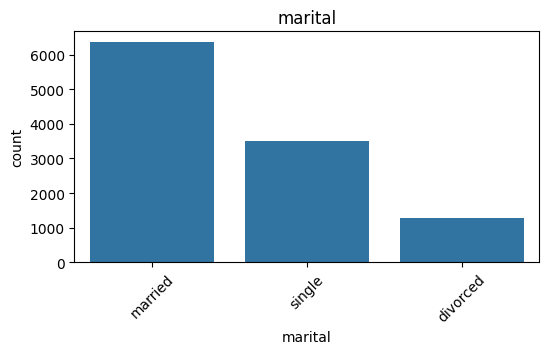

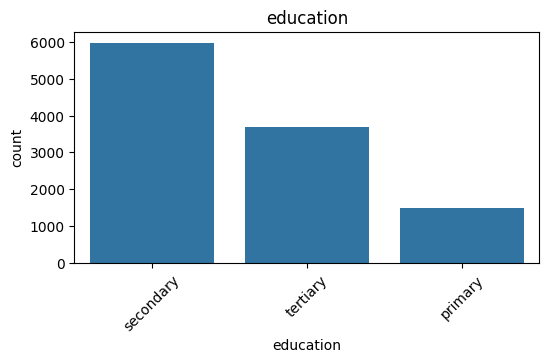

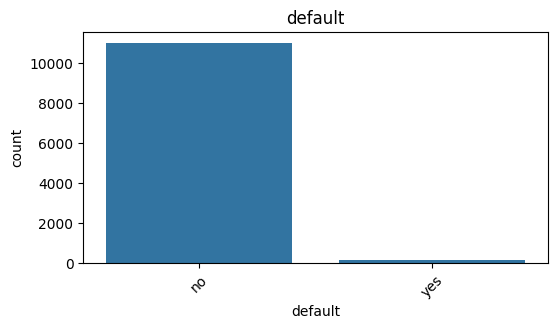

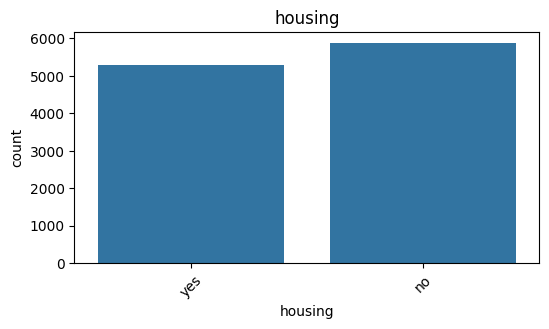

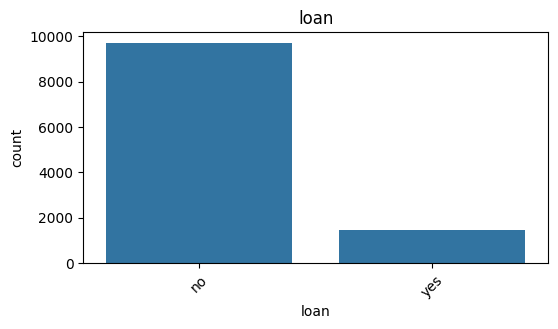

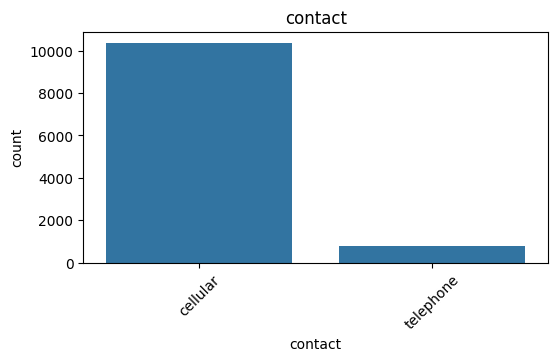

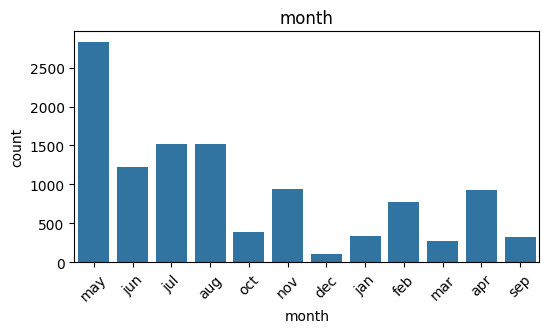

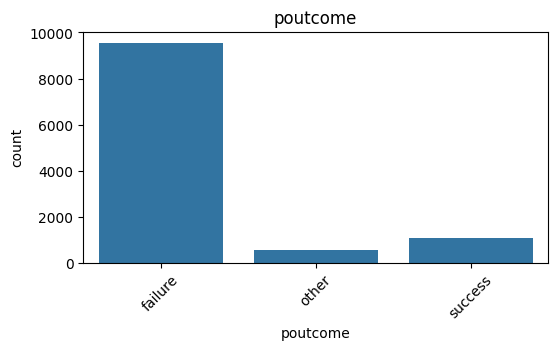

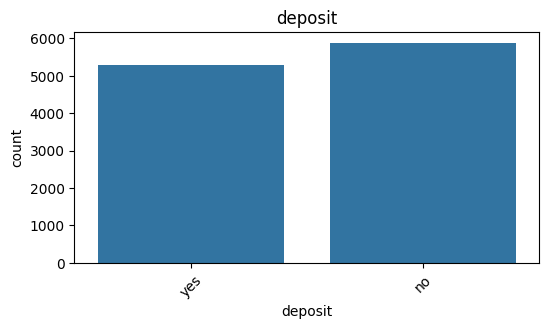

In [15]:
cat_cols = df.select_dtypes(include="object").columns

for col in cat_cols:
    plt.figure(figsize=(6,3))
    sns.countplot(data=df, x=col)
    plt.title(col)
    plt.xticks(rotation=45)
    plt.show()

** Poutcome is not balanced /// month has an outlier in May///Contact is imbalance ///loan is imbalance //// default is imbalance and Job has an outlier**

** Visualize Outliers**

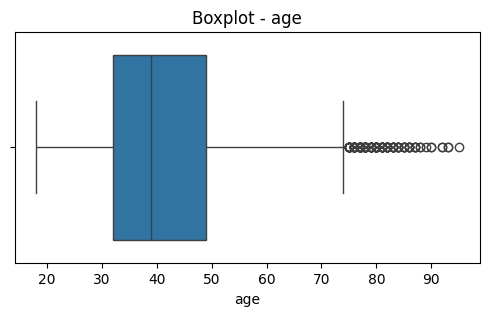

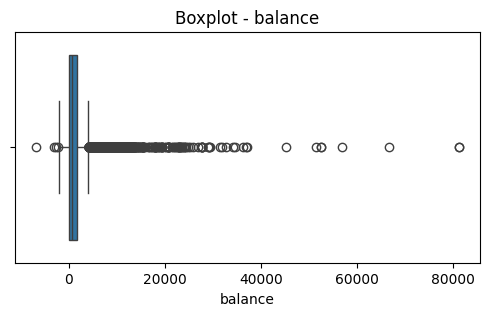

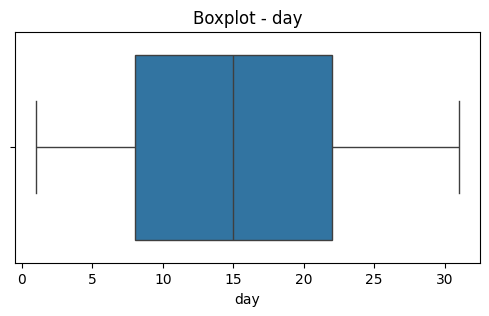

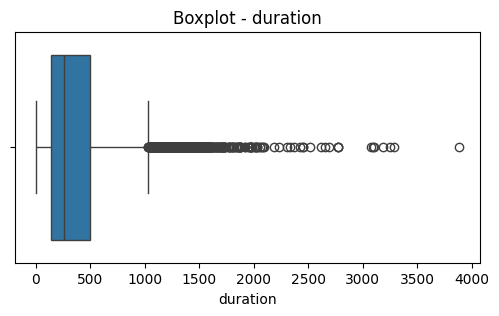

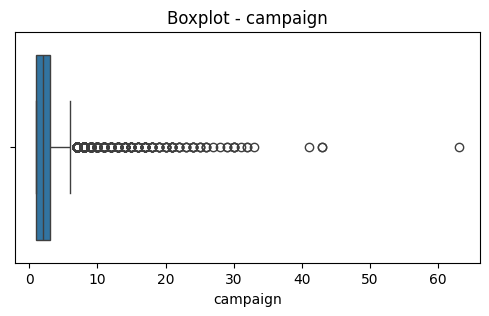

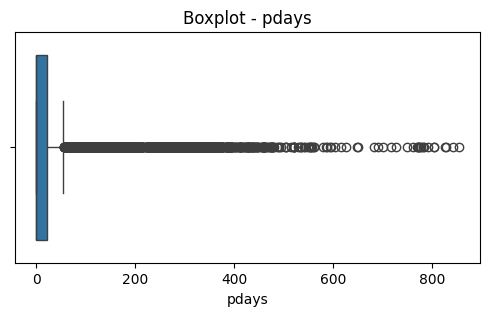

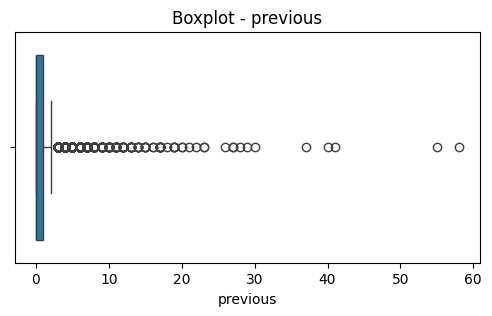

In [17]:
num_cols = df.select_dtypes(include=np.number).columns

for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(data=df, x=col)
    plt.title("Boxplot - " + col)
    plt.show()

**Correlation (Heatmap)**

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()

ValueError: could not convert string to float: 'admin.'

<Figure size 1000x800 with 0 Axes>

** This does not work because heatmap works only on numerical Data**

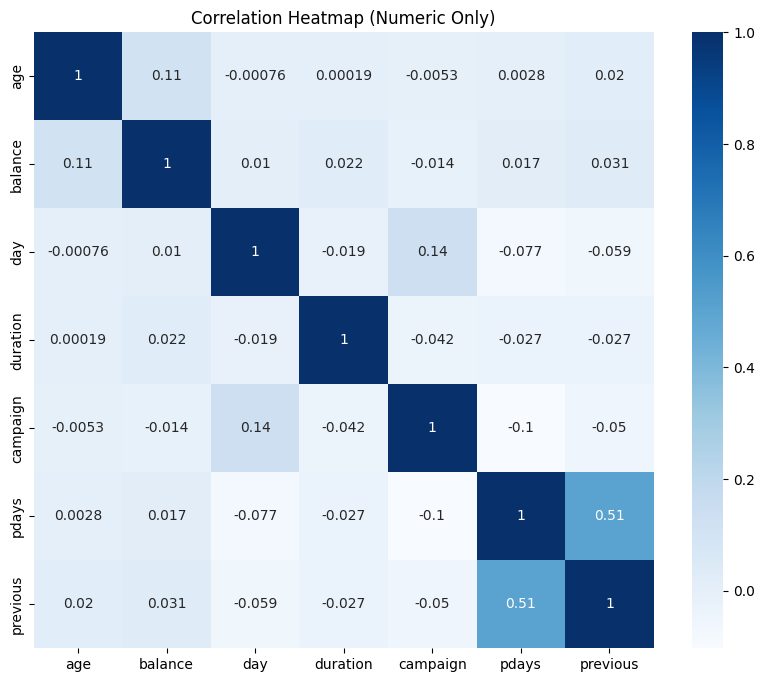

In [19]:
plt.figure(figsize=(10,8))
num_df = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(num_df.corr(), annot=True, cmap="Blues")
plt.title("Correlation Heatmap (Numeric Only)")
plt.show()


** We will Encode Numerical Feature  Label encoding for target  yes=1 and no=0**

In [23]:

df["deposit"] = LabelEncoder().fit_transform(df["deposit"])

**One Hot encoding for the rest of them**

In [24]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [25]:
df_encoded.head()

,age,balance,day,duration,campaign,pdays,previous,deposit,job_blue-collar,job_entrepreneur,...,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success
0,59,2343,5,1042,1,-1,0,1,False,False,...,False,False,False,False,True,False,False,False,False,False
1,56,45,5,1467,1,-1,0,1,False,False,...,False,False,False,False,True,False,False,False,False,False
2,41,1270,5,1389,1,-1,0,1,False,False,...,False,False,False,False,True,False,False,False,False,False
3,55,2476,5,579,1,-1,0,1,False,False,...,False,False,False,False,True,False,False,False,False,False
4,54,184,5,673,2,-1,0,1,False,False,...,False,False,False,False,True,False,False,False,False,False


** Scaling Numerical Features to prevent Bias**

In [26]:
num_cols = ['age','balance','day','duration','campaign','pdays','previous']

In [27]:
df_encoded[num_cols] = StandardScaler().fit_transform(df_encoded[num_cols])

In [28]:
df_encoded.head()

,age,balance,day,duration,campaign,pdays,previous,deposit,job_blue-collar,job_entrepreneur,...,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success
0,1.491505,0.252525,-1.265746,1.930226,-0.554168,-0.481184,-0.36326,1,False,False,...,False,False,False,False,True,False,False,False,False,False
1,1.239676,-0.459974,-1.265746,3.154612,-0.554168,-0.481184,-0.36326,1,False,False,...,False,False,False,False,True,False,False,False,False,False
2,-0.019470,-0.080160,-1.265746,2.929901,-0.554168,-0.481184,-0.36326,1,False,False,...,False,False,False,False,True,False,False,False,False,False
3,1.155733,0.293762,-1.265746,0.596366,-0.554168,-0.481184,-0.36326,1,False,False,...,False,False,False,False,True,False,False,False,False,False
4,1.071790,-0.416876,-1.265746,0.867171,-0.186785,-0.481184,-0.36326,1,False,False,...,False,False,False,False,True,False,False,False,False,False


In [35]:


import pandas as pd

# Select only numeric columns
numeric_cols = df.select_dtypes(include='number').columns

Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Detect outliers in numeric columns only
outliers = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR)))

print(outliers.sum())  # Number of outliers per numeric column



age          171
balance     1055
day            0
duration     636
campaign     601
pdays       2750
previous    1258
deposit        0
dtype: int64


In [36]:

df_capped = df.copy()
for col in numeric_cols:
    lower_limit = Q1[col] - 1.5 * IQR[col]
    upper_limit = Q3[col] + 1.5 * IQR[col]
    df_capped[col] = df_capped[col].clip(lower=lower_limit, upper=upper_limit)


import numpy as np
df_capped['balance_log'] = np.log1p(df_capped['balance'])
df_capped['pdays_log'] = np.log1p(df_capped['pdays'])


/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [38]:
df_processed = df.copy()

# for numerical columns only
numeric_cols = df_processed.select_dtypes(include='number').columns


Q1 = df_processed[numeric_cols].quantile(0.25)
Q3 = df_processed[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

log_cols = ['balance', 'pdays']

for col in numeric_cols:
    # Capping for all cols except log
    if col not in log_cols:
        lower_limit = Q1[col] - 1.5 * IQR[col]
        upper_limit = Q3[col] + 1.5 * IQR[col]
        df_processed[col] = df_processed[col].clip(lower=lower_limit, upper=upper_limit)

# Log transformation for Big columns
for col in log_cols:
    #Prevent any negative values
    df_processed[col] = np.log1p(df_processed[col].clip(lower=0))


print("Summary after preprocessing:")
print(df_processed.describe())

Summary after preprocessing:
                age       balance           day      duration      campaign  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      41.152347      5.617849     15.658036    352.948486      2.238577   
std       11.659113      2.657302      8.420740    284.714889      1.521158   
min       18.000000      0.000000      1.000000      2.000000      1.000000   
25%       32.000000      4.812184      8.000000    138.000000      1.000000   
50%       39.000000      6.311735     15.000000    255.000000      2.000000   
75%       49.000000      7.443664     22.000000    496.000000      3.000000   
max       74.500000     11.304732     31.000000   1033.000000      6.000000   

              pdays      previous       deposit  
count  11162.000000  11162.000000  11162.000000  
mean       1.304331      0.485397      0.473840  
std        2.262713      0.892563      0.499338  
min        0.000000      0.000000      0.000000  
25%      

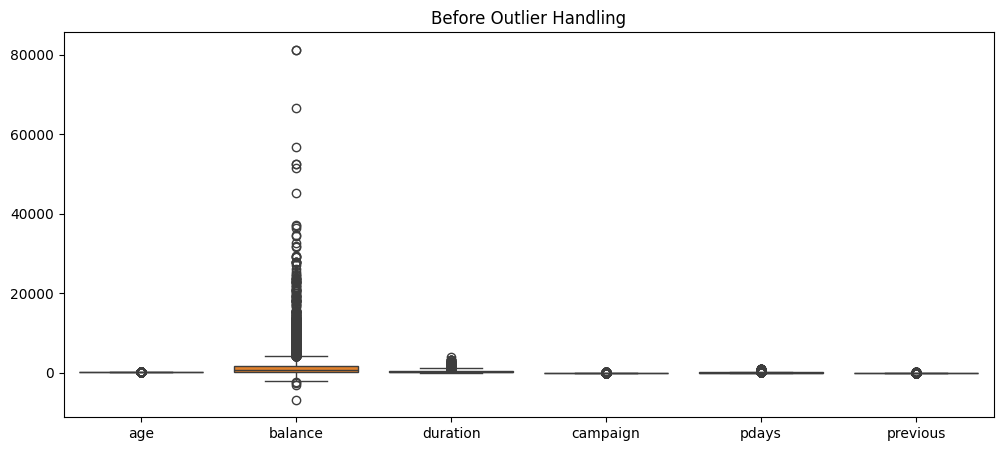

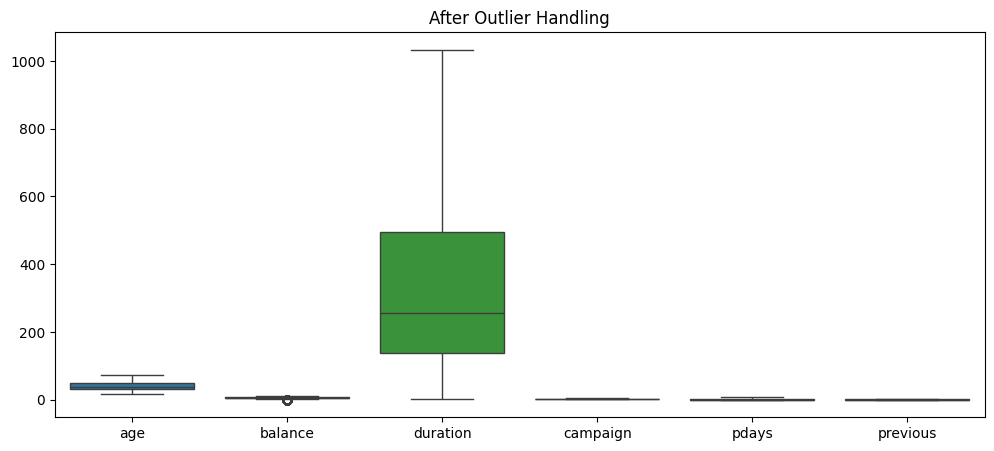

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

#Before Logging and capping:
plt.figure(figsize=(12,5))
sns.boxplot(data=df[['age','balance','duration','campaign','pdays','previous']])
plt.title("Before Outlier Handling")
plt.show()

#After:
plt.figure(figsize=(12,5))
sns.boxplot(data=df_processed[['age','balance','duration','campaign','pdays','previous']])
plt.title("After Outlier Handling")
plt.show()


** To Show Distribution after and before handling Outliers**

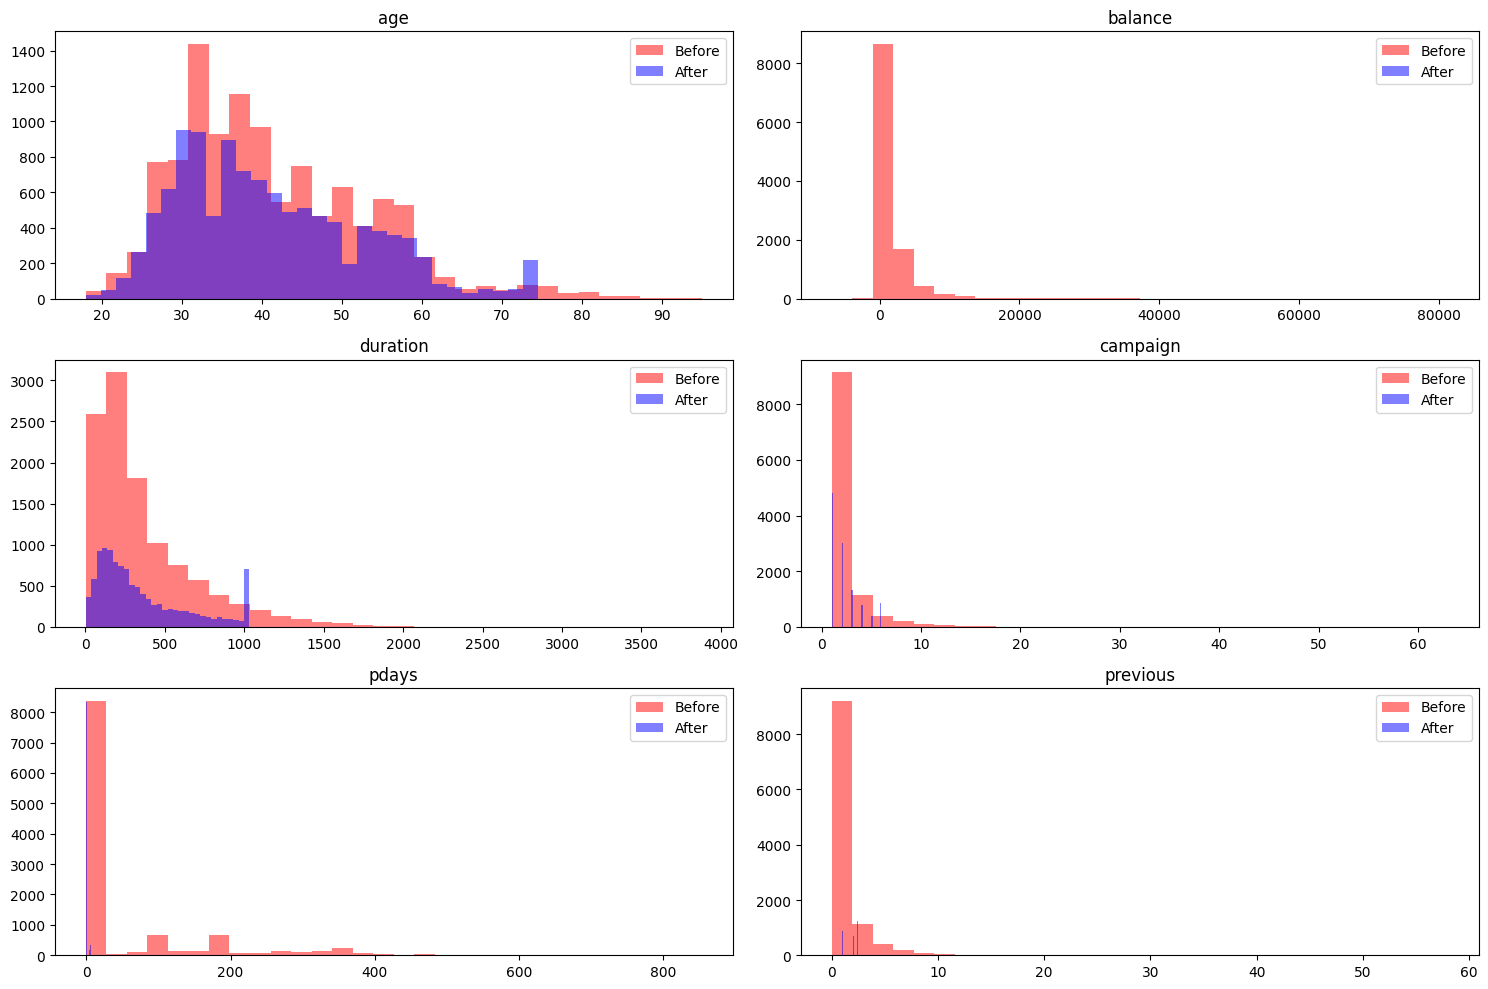

In [41]:
import matplotlib.pyplot as plt

numeric_cols = ['age','balance','duration','campaign','pdays','previous']

# Plot distributions
plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 2, i+1)
    plt.hist(df[col], bins=30, alpha=0.5, label='Before', color='red')
    plt.hist(df_processed[col], bins=30, alpha=0.5, label='After', color='blue')
    plt.title(col)
    plt.legend()
plt.tight_layout()
plt.show()


** Data Splitting**

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X = df_encoded.drop("deposit", axis=1)
y = df_encoded["deposit"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (8929, 38)
Test shape: (2233, 38)


**Start ML Model (Clustering)**